<a href="https://colab.research.google.com/github/Dennieeeee/KPMG-virtual-internship/blob/master/KPMG_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview:
This dataset contains variables gender, transaction_date, online_order order_status, brand, product_line, product_class, product_size, list_price,  standard_cost.

Business question is to target the right customer for each brand.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/KPMG_new_data.csv'

In [4]:
df = pd.read_csv(url)

# Preparing the Dataset

In [5]:
df1=df[['gender','transaction_date','online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost']]

In [6]:
df1.head()

,gender,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,Female,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
1,Female,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48
2,Female,2017-10-30,1.0,Approved,Solex,Standard,medium,medium,100.35,75.26
3,Female,2017-01-30,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43
4,Female,2017-01-20,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51


In [7]:
df1.columns

Index(['gender', 'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost'],
      dtype='object')

In [44]:
df1.isnull().sum()

gender               0
transaction_date     0
online_order        88
order_status         0
brand               53
product_line        53
product_class       53
product_size        53
list_price           0
standard_cost       53
dtype: int64

In [43]:
df1['order_status'].value_counts()

Approved     10100
Cancelled      103
Name: order_status, dtype: int64

In [9]:
df1.describe()

,online_order,list_price,standard_cost
count,10035.000000,10203.000000,10104.000000
mean,0.501545,1108.163378,557.809863
std,0.500023,581.577621,406.813848
min,0.000000,12.010000,7.210000
25%,0.000000,575.270000,215.140000
50%,1.000000,1151.960000,486.150000
75%,1.000000,1635.300000,795.100000
max,1.000000,2091.470000,1759.850000


In [10]:
#sample size of online order: Yes and No
online_order_yes = df1.loc[df1['online_order']==1]
online_order_no = df1.loc[df1['online_order']==0]
print(online_order_yes.shape,online_order_no.shape)

(5033, 10) (5002, 10)


In [11]:
#sample size of female and male guests
female = df1.loc[df1['gender']=='Female']
male = df1.loc[df1['gender']=='Male']
print(female.shape,male.shape)

(5186, 10) (5017, 10)


In [12]:
df1.groupby('gender').agg({'list_price':'mean'})

,list_price
gender,
Female,1099.758299
Male,1116.851587


In [13]:
#online itmes are cheaper
df1.groupby('online_order').agg({'list_price':'mean','standard_cost':'mean'})

,list_price,standard_cost
online_order,,
0.0,1111.816885,560.888414
1.0,1103.788935,555.280286


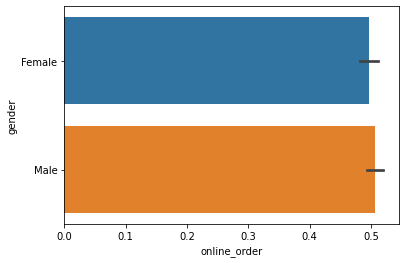

In [14]:
sns.barplot(x='online_order',y='gender',data=df1)

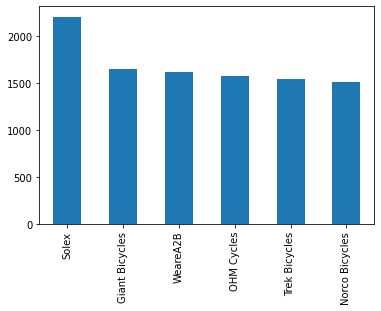

In [15]:
df1['brand'].value_counts().plot(kind='bar')

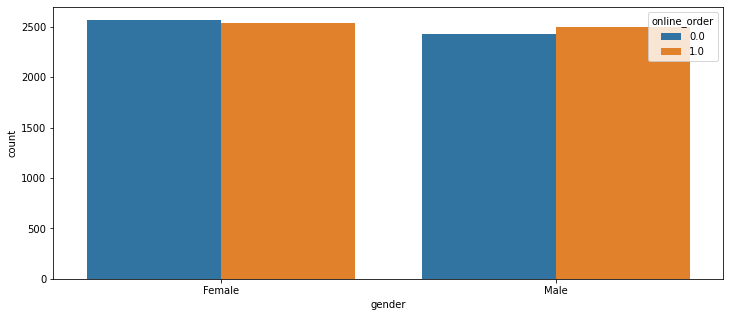

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='gender', hue='online_order',data=df)
plt.show()

# Descriptive Statistics

Questions: 
1. Do men have higher buying power than women?
2. What's the most popular brand among the two groups: women and men?
3. What's the most popular brand among the women and men who have high power?

- Note: list_price higher than the mean is considered as high buying power
- the average list price is 1108

###Which group has the highest buying power?

In [17]:
df1.columns

Index(['gender', 'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost'],
      dtype='object')

In [18]:
#split the df1 into groups: male and female
male = df1[df1['gender']=='Male']
female=df1[df1['gender']=='Female']

In [19]:
#split the df1 into two groups with high buying power
male1 = df1[(df1.gender == 'Male') & (df1.list_price > 1108)]
female1 = df1[(df1.gender == 'Female') & (df1.list_price > 1108)]

In [20]:
print (np.shape(male1), np.shape(male))

(2697, 10) (5017, 10)


In [21]:
print (np.shape(female1), np.shape(female))

(2741, 10) (5186, 10)


In [22]:
#people who have the high buying power among the entire dataset
df2 = df1[df1.list_price > 1108]

In [23]:
print ('The rate of people with high buying power is: ',
    int(len(df2) / float(len(df1)) * 100), '%.')
print('The rate of men with high buying power is: ',
      int(len(male1)/float(len(male)) * 100), '%,')
print('The rate of men with high buying power is: ',
      int(len(female1)/float(len(female)) * 100), '%,')

The rate of people with high buying power is:  53 %.
The rate of men with high buying power is:  53 %,
The rate of men with high buying power is:  52 %,


###What's the most popular brand among all the people regardless of their buying power.

In [24]:
df1['brand'].value_counts()

Solex             2204
Giant Bicycles    1654
WeareA2B          1618
OHM Cycles        1571
Trek Bicycles     1547
Norco Bicycles    1510
Name: brand, dtype: int64

In [25]:
solex = df1[df1.brand == 'Solex']
giant_bicycles = df1[df1.brand == 'Giant Bicycles']
weareA2B = df1[df1.brand == 'WeareA2B']
OHM_cycles = df1[df1.brand == 'OHM Cycles']
trek_bicycles = df1[df1.brand == 'Trek Bicycles']
norco_bicycles = df1[df1.brand == 'Norco Bicycles']

In [26]:
print ('The rate of Solex is: ', round((len(solex)/len(df1))*100,2), '%. This is the most popular brand among all the people')
print ('The rate of Giant Bicycles is: ', round(len(giant_bicycles)/len(df1)*100,2), '%.')
print ('The rate of WeareA2B is: ',
       round(len(weareA2B)/len(df1)*100,2), '%.')
print ('The rate of OHM Cycles is: ',
       round(len(OHM_cycles)/len(df1)*100,2), '%.')
print ('The rate of Trek Bicycles is: ',
       round(len(trek_bicycles)/len(df1)*100,2), '%.')
print ('The rate of Norco Bicycles is: ',
       round(len(norco_bicycles)/len(df1)*100,2), '%.')

The rate of solex is:  21.6 %. This is the most popular brand among all the people
The rate of Giant Bicycles is:  16.21 %.
The rate of WeareA2B is:  15.86 %.
The rate of OHM Cycles is:  15.4 %.
The rate of Trek Bicycles is:  15.16 %.
The rate of Norco Bicycles is:  14.8 %.


In [27]:
#find the most popular brand between women and men of the entire dataset
#Solex
solex_m = solex[solex.gender == 'Male']
solex_f = solex[solex.gender == 'Female']
#Giant Bicycles
giant_bicycles_m = giant_bicycles[giant_bicycles.gender == 'Male']
giant_bicycles_f = giant_bicycles[giant_bicycles.gender == 'Female']
#WeareA2B
weareA2B_m = weareA2B[weareA2B.gender == 'Male']
weareA2B_f = weareA2B[weareA2B.gender == 'Female']
#OHM_cycles
OHM_cycles_m = OHM_cycles[OHM_cycles.gender == 'Male']
OHM_cycles_f = OHM_cycles[OHM_cycles.gender == 'Female']
#trek bicycles
trek_bicyles_m = trek_bicycles[trek_bicycles.gender == 'Male']
trek_bicyles_f = trek_bicycles[trek_bicycles.gender == 'Female']
#Norco Bicycles
norco_bicycles_m = norco_bicycles[norco_bicycles.gender == 'Male']
norco_bicycles_f = norco_bicycles[norco_bicycles.gender == 'Female']

In [32]:
print('The percent of men like Solex is: ', round(len(solex_m)/len(solex)*100,2), '%.')
print('The percent of women like Solex is: ', round(len(solex_f)/len(solex)*100,2), '%.')
print ('More women like Solex than men.')

The percent of men like Solex is:  48.68 %.
The percent of women like Solex is:  51.32 %.
More women like Solex than men.


In [34]:
#
print('The percent of men like Giant Bicycles is: ', round(len(giant_bicycles_m)/len(giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(giant_bicycles_f)/len(giant_bicycles)*100,2), '%.')
print ('More women like Giant Bicycles than men.')


The percent of men like Giant Bicycles is:  49.76 %.
The percent of women like Giant Bicycles is:  50.24 %.
More women like Giant Bicycles than men.


In [35]:
print('The percent of men like WeareA2B is: ', round(len(weareA2B_m)/len(weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(weareA2B_f)/len(weareA2B)*100,2), '%.')
print ('More women like WeareA2B than men.')


The percent of men like WeareA2B is:  48.7 %.
The percent of women like WeareA2B is:  51.3 %.
More women like WeareA2B than men.


In [33]:
#
print('The percent of men like OHM Cycles is: ', round(len(OHM_cycles_m)/len(OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(OHM_cycles_f)/len(OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  49.01 %.
The percent of women like OHM Cycles is:  50.99 %.
More women like OHM Cycles than men.


In [36]:
print('The percent of men like Trek Bicycles is: ', round(len(trek_bicyles_m)/len(trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(trek_bicyles_f)/len(trek_bicycles)*100,2), '%.')

The percent of men like Trek Bicycles is:  48.87 %.
The percent of women like Trek Bicycles is:  51.13 %.


In [38]:
print('The percent of men like Norco Bicycles is: ', round(len(norco_bicycles_m)/len(norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(norco_bicycles_f)/len(norco_bicycles)*100,2), '%.')
print ('This is the only item that more men purchased than women!!!!!')

The percent of men like Norco Bicycles is:  50.07 %.
The percent of women like Norco Bicycles is:  49.93 %.
This is the only item that more men purchased than women!!!!!


###Among the people who have high buying power, what do they like to buy?

In [39]:
df2['brand'].value_counts()

WeareA2B          1174
Giant Bicycles    1161
Solex             1017
Trek Bicycles      743
OHM Cycles         689
Norco Bicycles     601
Name: brand, dtype: int64

In [40]:
df2_solex = df2[df2.brand == 'Solex']
df2_giant_bicycles = df2[df2.brand == 'Giant Bicycles']
df2_weareA2B = df2[df2.brand == 'WeareA2B']
df2_OHM_cycles = df2[df2.brand == 'OHM Cycles']
df2_trek_bicycles = df2[df2.brand == 'Trek Bicycles']
df2_norco_bicycles = df2[df2.brand == 'Norco Bicycles']

In [46]:
#find the most popular brand between women and men of people who have high buying power
#Solex
df2_solex_m = df2_solex[df2_solex.gender == 'Male']
df2_solex_f = df2_solex[df2_solex.gender == 'Female']
#Giant Bicycles
df2_giant_bicycles_m = df2_giant_bicycles[df2_giant_bicycles.gender == 'Male']
df2_giant_bicycles_f = df2_giant_bicycles[df2_giant_bicycles.gender == 'Female']
#WeareA2B
df2_weareA2B_m = df2_weareA2B[df2_weareA2B.gender == 'Male']
df2_weareA2B_f = df2_weareA2B[df2_weareA2B.gender == 'Female']
#OHM_cycles
df2_OHM_cycles_m = df2_OHM_cycles[df2_OHM_cycles.gender == 'Male']
df2_OHM_cycles_f = df2_OHM_cycles[df2_OHM_cycles.gender == 'Female']
#trek bicycles
df2_trek_bicyles_m = df2_trek_bicycles[df2_trek_bicycles.gender == 'Male']
df2_trek_bicyles_f = df2_trek_bicycles[df2_trek_bicycles.gender == 'Female']
#Norco Bicycles
df2_norco_bicycles_m = df2_norco_bicycles[df2_norco_bicycles.gender == 'Male']
df2_norco_bicycles_f = df2_norco_bicycles[df2_norco_bicycles.gender == 'Female']

In [47]:
#solex
print('The percent of men purchased Solex is: ', round(len(df2_solex_m)/len(df2_solex)*100,2), '%.')
print('The percent of women purchased Solex is: ', round(len(df2_solex_f)/len(df2_solex)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men purchased Solex is:  50.64 %.
The percent of women purchased Solex is:  49.36 %.


In [48]:
#Giant Bicycles
print('The percent of men like Giant Bicycles is: ', round(len(df2_giant_bicycles_m)/len(df2_giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(df2_giant_bicycles_f)/len(df2_giant_bicycles)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men like Giant Bicycles is:  50.04 %.
The percent of women like Giant Bicycles is:  49.96 %.
More women like Giant Bicycles than men.


In [51]:
#WeareA2B
print('The percent of men like WeareA2B is: ', round(len(df2_weareA2B_m)/len(df2_weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(df2_weareA2B_f)/len(df2_weareA2B)*100,2), '%.')
print ('More women purchased WeareA2B than men.')

The percent of men like WeareA2B is:  47.96 %.
The percent of women like WeareA2B is:  52.04 %.
More women purchased WeareA2B than men.


In [52]:
#OHM Cycles
print('The percent of men like OHM Cycles is: ', round(len(df2_OHM_cycles_m)/len(df2_OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(df2_OHM_cycles_f)/len(df2_OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  49.93 %.
The percent of women like OHM Cycles is:  50.07 %.
More women like OHM Cycles than men.


In [55]:
#Trek Bicycles
print('The percent of men like Trek Bicycles is: ', round(len(df2_trek_bicyles_m)/len(df2_trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(df2_trek_bicyles_f)/len(df2_trek_bicycles)*100,2), '%.')
print ('More men like Trek Bicycles than women.')

The percent of men like Trek Bicycles is:  50.2 %.
The percent of women like Trek Bicycles is:  49.8 %.
More men like Trek Bicycles than women.


In [57]:
#Norco Bicycles
print('The percent of men like Norco Bicycles is: ', round(len(df2_norco_bicycles_m)/len(df2_norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(df2_norco_bicycles_f)/len(df2_norco_bicycles)*100,2), '%.')
print ('More women like Norco Bicycles than men.')

The percent of men like Norco Bicycles is:  48.92 %.
The percent of women like Norco Bicycles is:  51.08 %.
More women like Norco Bicycles than men.


#Conclusion
Generally, men have higher buying power than women. However, if we don't consider who has higher buying power, women are more likely to buy all brands except Norco Bicycles and Solex is the most popular brand. If we want to target people who have the highest buying power, their favorite brand is WearA2B. Women who has high buying power like WeareA2B, OHM Cycles, and Norco Bicycls. Men who have high power power like Solex, Giant Bicycles, and Trek Bicycles.
